In [1]:
from qiskit import *
from qiskit.visualization import plot_histogram

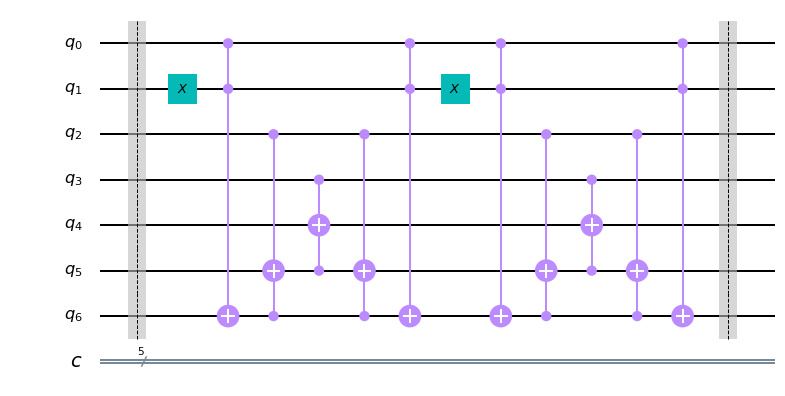

In [29]:
ship_coords = (11, 15) # Imagina un mapa como este:

#  0    1    2    3  
#  4    5    6    7
#  8    9    10   11
#  12   13   14   15


binary_coords = [list(bin(ship_coords[0])[2:]),
                 list(bin(ship_coords[1])[2:])]

game_operator = QuantumCircuit(7, 5)
game_operator.barrier(range(7))
for coord in binary_coords:
    
    for j, i in enumerate(coord):
        if i == '0':
            game_operator.x(j)
            
    game_operator.ccx(0,1,6)
    game_operator.ccx(2,6,5)
    game_operator.ccx(3,5,4)
    game_operator.ccx(2,6,5)
    game_operator.ccx(0,1,6)
    
    for j, i in enumerate(coord):
        if i == '0':
            game_operator.x(j)
game_operator.barrier(range(7))


"""   game_operator haría lo siguiente:

       _____
|x>---|     |---|x>
      |  G  |
|0>---|_____|---|G(x)>


siendo:  | G(x) = 0 si es agua
         | G(x) = 1 si es tocado


"""

game_operator.draw(output = 'mpl')

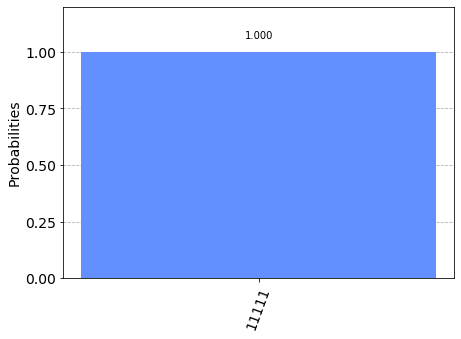

In [34]:
quest_operator = QuantumCircuit(7, 5)
quest_operator.x(range(4))

circ = quest_operator + game_operator

circ.measure(range(5), range(5))
backend = Aer.get_backend('qasm_simulator')
job = execute(circ, backend, shots=1)
result = job.result()
counts = result.get_counts(circ)

"""

En este caso, hemos metido el 1111 que equivale a la posición 15
Por tanto la salida (el qubit de abajo del todo) es un uno, tocado.

"""

plot_histogram(counts)

'\n\nEn este caso, hemos metido el 1111 que equivale a la posición 15\nPor tanto la salida (el qubit de abajo del todo) es un uno.\n\n'